In [1]:
import jax 
import jax.numpy as jnp
import numpy as np

In [2]:
from parameters import init_MLSNN

In [3]:
layer_widths = [700, 256, 128, 20]

In [4]:
from hyperparameters import SimArgs

args = SimArgs(
    n_in = 700,
    n_h=256,
    bias_enable=True,
    train_tau=True,
    seed=42, 
    tau_mem=20e-3,
    tau_syn=10e-3,
    nb_epochs=100,
    lr=0.001,
)
    

In [5]:
key, p = init_MLSNN(jax.random.PRNGKey(42), layer_widths, args)

I0000 00:00:1715613245.436020       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


In [6]:
print(jax.tree_map(lambda x: x.shape, p))

[[(256, 700), (256, 256), (256,), (256,), (256,)], [(128, 256), (128, 128), (128,), (128,), (128,)], [(20, 128)]]


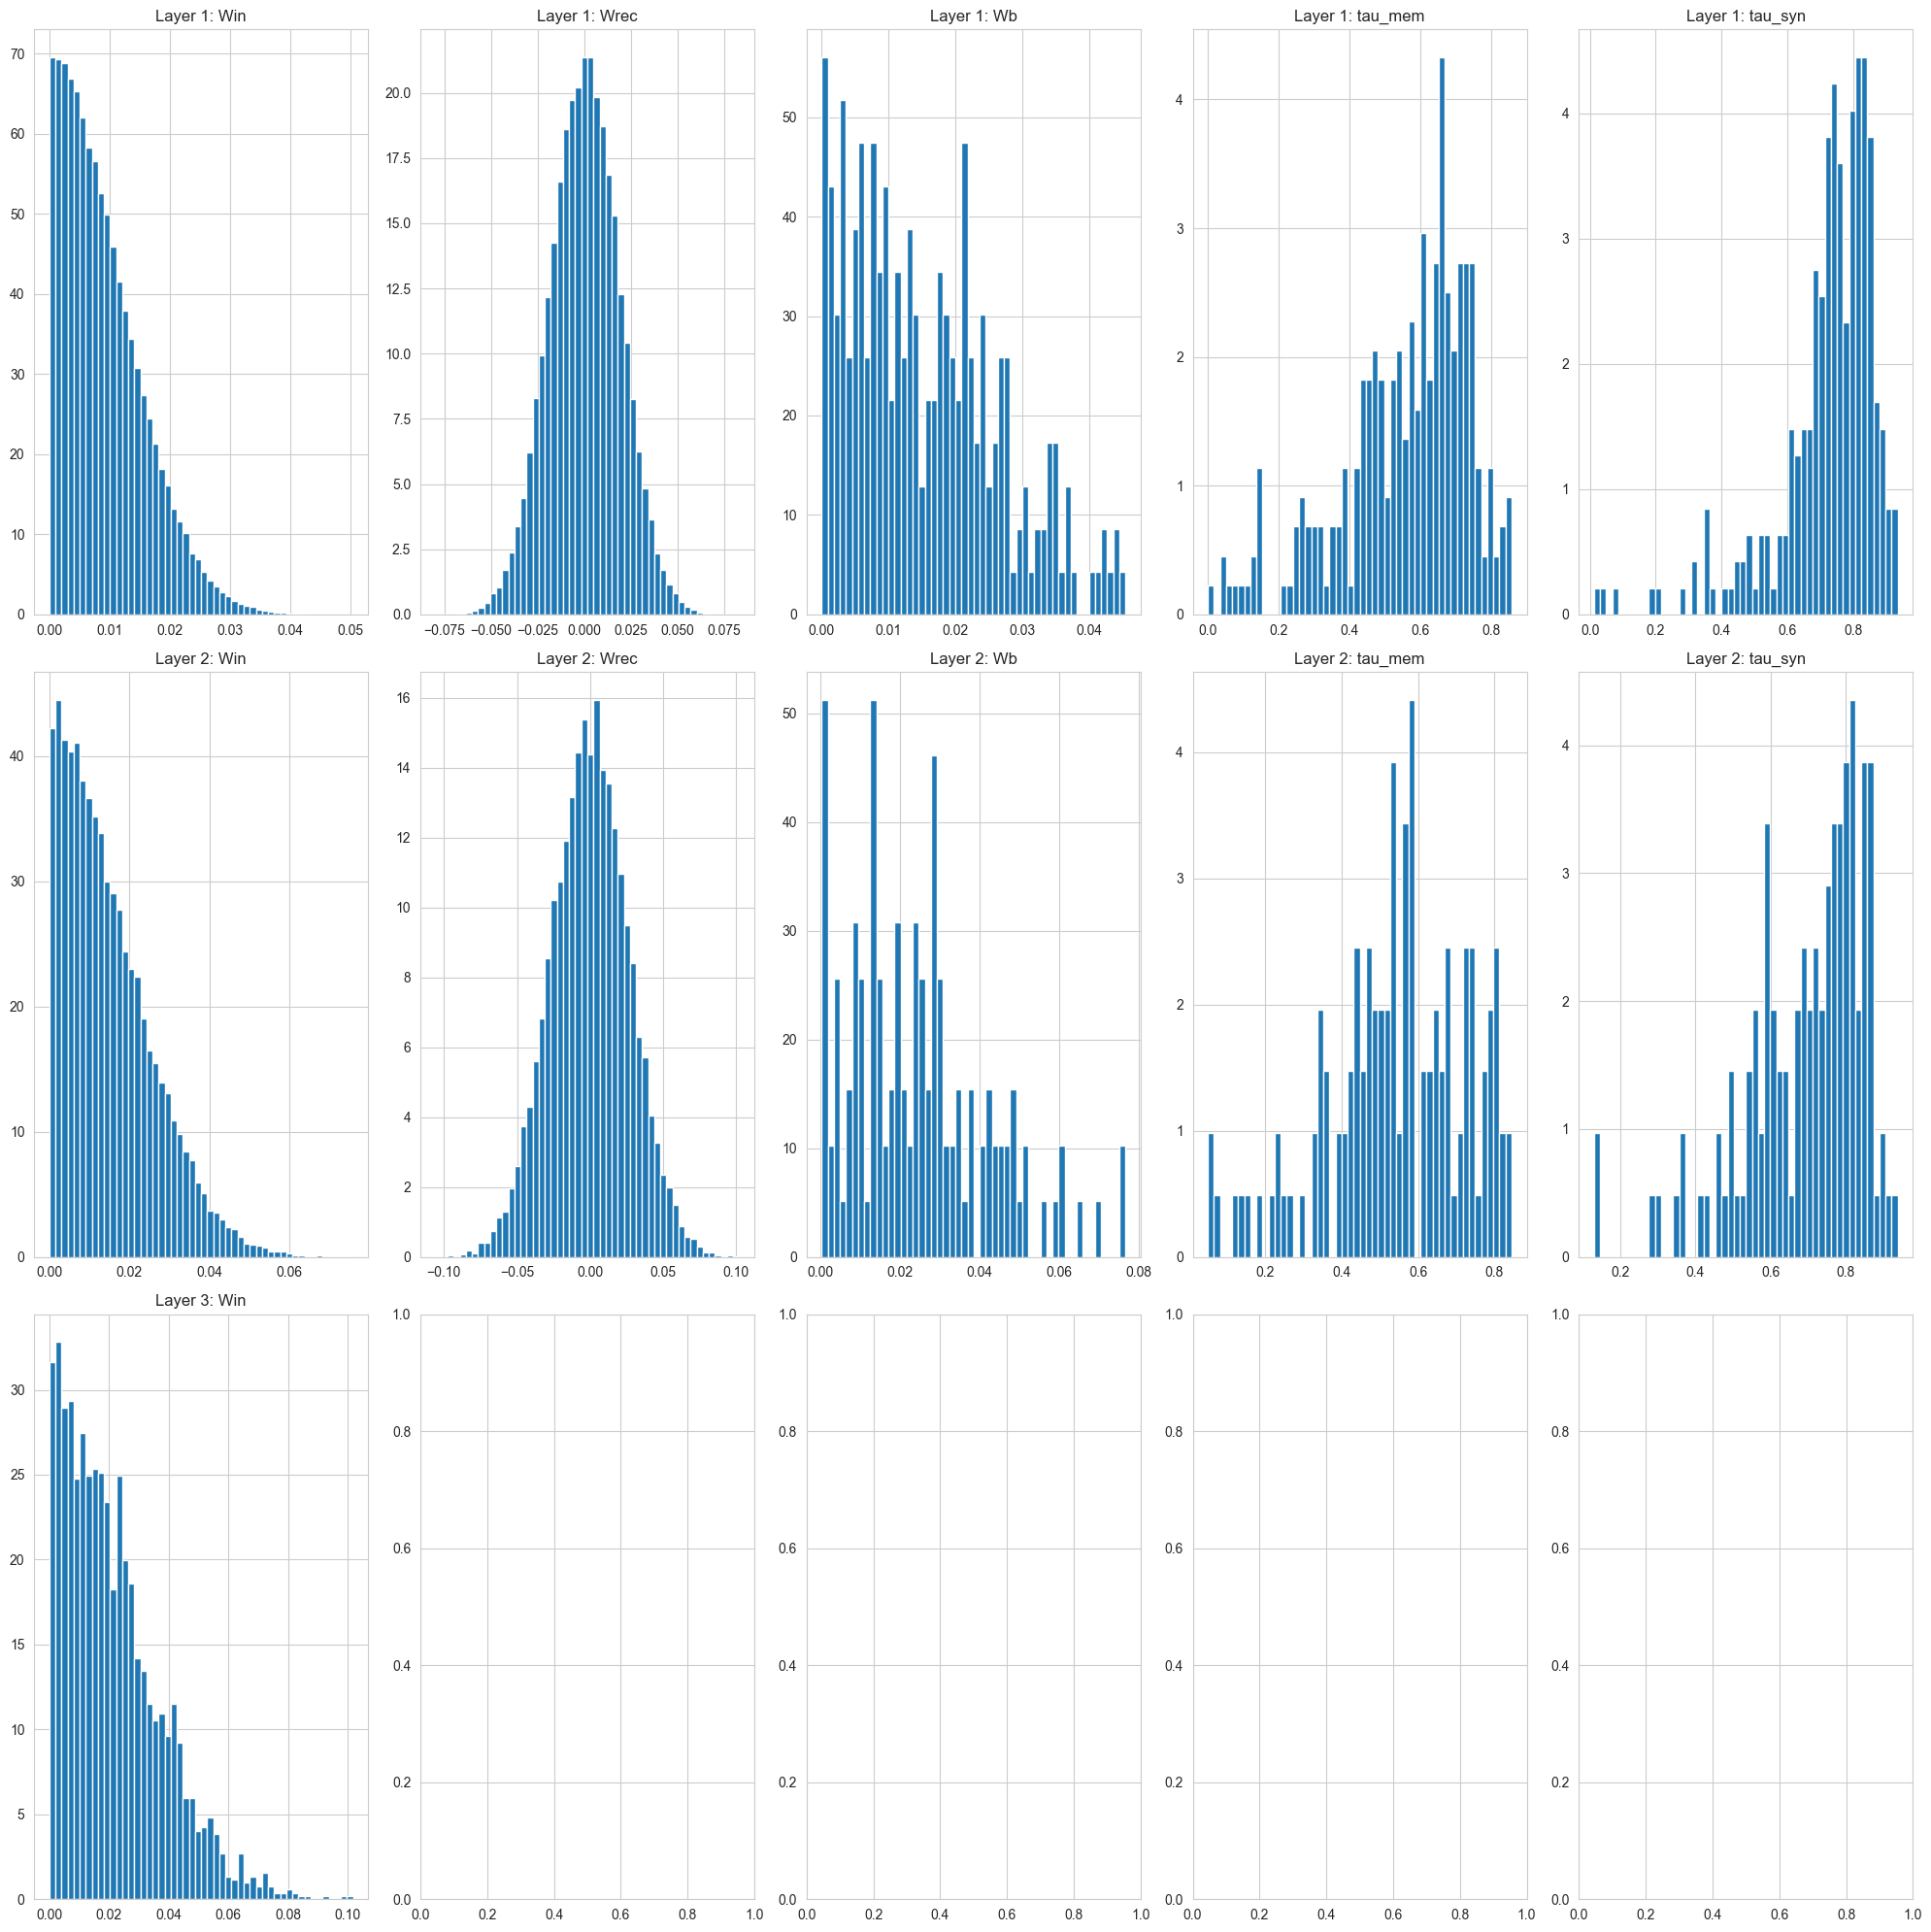

In [7]:
import matplotlib.pyplot as plt

n_rows = len(p)
n_cols = len(p[0])
n_bin = 50
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))
for layer_id, layer in enumerate(p):
    axs[layer_id, 0].hist(layer[0].flatten(), bins=n_bin, density=True)
    axs[layer_id, 0].set_title(f'Layer {layer_id+1}: Win')
    if layer_id == n_rows-1:
        break
    axs[layer_id, 1].hist(layer[1].flatten(), bins=n_bin, density=True)
    axs[layer_id, 1].set_title(f'Layer {layer_id+1}: Wrec')
    if n_cols == 5:
        axs[layer_id, 2].hist(layer[2], bins=n_bin, density=True)
        axs[layer_id, 2].set_title(f'Layer {layer_id+1}: Wb')
    axs[layer_id, -2].hist(layer[-2], bins=n_bin, density=True)
    axs[layer_id, -2].set_title(f'Layer {layer_id+1}: tau_mem')
    axs[layer_id, -1].hist(layer[-1], bins=n_bin, density=True)
    axs[layer_id, -1].set_title(f'Layer {layer_id+1}: tau_syn')

plt.tight_layout()
plt.show()